In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import display, clear_output
import time
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d
from IPython.display import Video
import matplotlib.image as mpimg
import matplotlib.animation as animation
import ipywidgets as widgets
import ffmpeg

In [2]:
# Dimensionless data

G = 1

m2 = 3.054200000000000e-6
m1 = 1 - m2

r12 = 1

x1 = -m2
x2 = m1

w = 1

mu1 = m1
mu2 = m2

In [3]:
# Initial conditions 

x = 1.0111555695836572
y = 0
z = 3.3421700407359777e-3	

xd = 0
yd = -1.0398439218275901e-2
zd = 0

# period

t_final = 3.0913102168233957

In [4]:
# initial rho1 and rho2

rho1 = np.sqrt(((x-x1)**2)+(y**2)+(z**2))

rho2 = np.sqrt(((x-x2)**2)+(y**2)+(z**2))

rho1,rho2

(np.float64(1.0111641471851347), np.float64(0.011648389816897127))

In [5]:
# Jacobi constant

c = (w**2)*((x**2)+(y**2)) + ((2*mu1)/(rho1)) + ((2*mu2)/(rho2)) - ((xd**2)+(yd**2)+(zd**2))

c

np.float64(3.0007640458258282)

In [6]:
def derivatives(x,y,z,xd,yd,zd):

    rho1 = np.sqrt(((x-x1)**2)+(y**2)+(z**2))
    rho2 = np.sqrt(((x-x2)**2)+(y**2)+(z**2))

    xdd = (w**2)*x + 2*w*yd - (mu1*(x-x1))/(rho1**3) - (mu2*(x-x2))/(rho2**3)
    
    ydd = (w**2)*y - 2*w*xd - (mu1*(y))/(rho1**3) - (mu2*(y))/(rho2**3) 

    zdd = - (mu1*(z))/(rho1**3) - (mu2*(z))/(rho2**3) 

    return (xdd, ydd, zdd)
    

In [7]:
# Runge-Kutta 4th-order

# Apeending values

r = []
r.append([x,y,z])

rd = []
rd.append([xd,yd,zd])

c_rk4 = []
c_rk4.append(c)

time = []
time.append(0)

# step-size

h = 0.0001

for i in range(int(t_final/h)):
    
    # k1

    call = derivatives(x,y,z,xd,yd,zd)
    
    k1_1 = call[0]
    k1_2 = call[1]
    k1_3 = call[2]
    k1_4 = xd
    k1_5 = yd
    k1_6 = zd
    
    
    # k2

    call = derivatives(x+(h/2)*k1_4, y+(h/2)*k1_5, z+(h/2)*k1_6, xd+(h/2)*k1_1, yd+(h/2)*k1_2, zd+(h/2)*k1_3)
    
    k2_1 = call[0]
    k2_2 = call[1]  
    k2_3 = call[2] 
    k2_4 = xd + (h/2)*k1_1
    k2_5 = yd + (h/2)*k1_2
    k2_6 = zd + (h/2)*k1_3
    
    
    # k3

    call = derivatives(x+(h/2)*k2_4, y+(h/2)*k2_5, z+(h/2)*k2_6, xd+(h/2)*k2_1, yd+(h/2)*k2_2, zd+(h/2)*k2_3)
    
    k3_1 = call[0]
    k3_2 = call[1] 
    k3_3 = call[2]  
    k3_4 = xd + (h/2)*k2_1
    k3_5 = yd + (h/2)*k2_2
    k3_6 = zd + (h/2)*k2_3
    
   
    # k4

    call = derivatives(x+h*k3_4, y+h*k3_5, z+h*k3_6, xd+h*k3_1, yd+h*k3_2, zd+h*k3_3)
    
    k4_1 = call[0] 
    k4_2 = call[1]   
    k4_3 = call[2] 
    k4_4 = xd + h*k3_1
    k4_5 = yd + h*k3_2
    k4_6 = zd + h*k3_3
    

    # update 
    
    xd = xd + (h/6) * ( k1_1 + 2*k2_1 + 2*k3_1 + k4_1 )
    yd = yd + (h/6) * ( k1_2 + 2*k2_2 + 2*k3_2 + k4_2 )
    zd = zd + (h/6) * ( k1_3 + 2*k2_3 + 2*k3_3 + k4_3 )
    x  = x  + (h/6) * ( k1_4 + 2*k2_4 + 2*k3_4 + k4_4 )
    y  = y  + (h/6) * ( k1_5 + 2*k2_5 + 2*k3_5 + k4_5 )
    z  = z  + (h/6) * ( k1_6 + 2*k2_6 + 2*k3_6 + k4_6 )

    # update 

    rho1 = np.sqrt(((x-x1)**2)+(y**2)+(z**2))
    rho2 = np.sqrt(((x-x2)**2)+(y**2)+(z**2))
    
    c = (w**2)*((x**2)+(y**2)) + ((2*mu1)/(rho1)) + ((2*mu2)/(rho2)) - ((xd**2)+(yd**2)+(zd**2))

    # append

    r.append([x,y,z])
    rd.append([xd,yd,zd])
    c_rk4.append(c)

    time.append((i+1)*h)

    

In [8]:
# convert into numpy arrays 

r = np.array(r)
rd = np.array(rd)
c_rk4 = np.array(c_rk4)  
time = np.array(time)

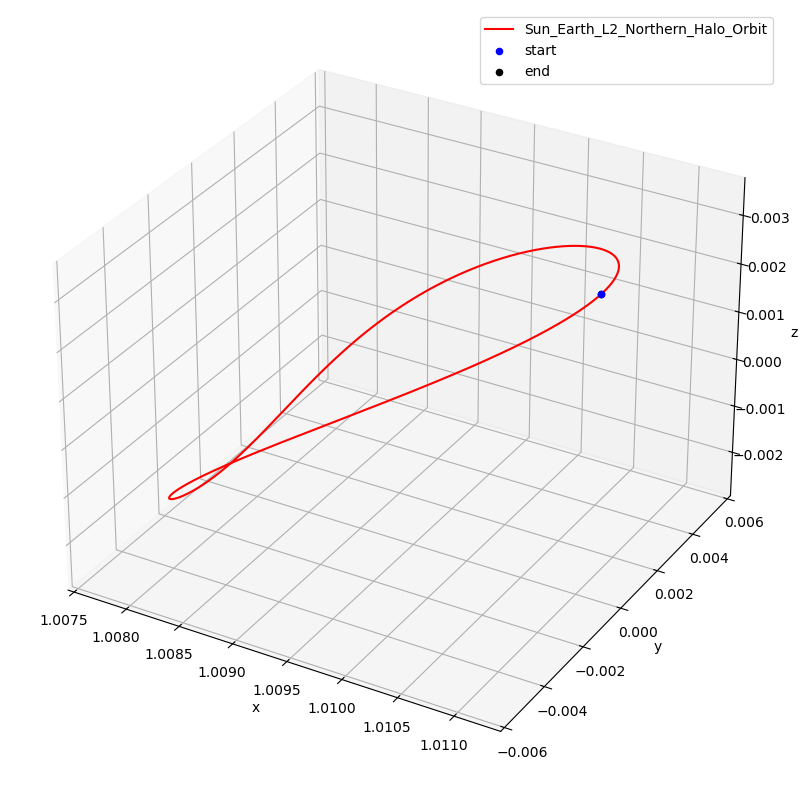

In [9]:
# plotting halo-orbit trajectory

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = r[:,0]
y = r[:,1]
z = r[:,2]   
    

ax.plot(x,y,z, label='Sun_Earth_L2_Northern_Halo_Orbit', color='red')
ax.scatter(x[0], y[0], z[0], color='blue', marker='o', label='start')
ax.scatter(x[-1], y[-1], z[-1], color='black', marker='o', label='end')


# Labels and legend

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.set_title('Halo-orbit')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

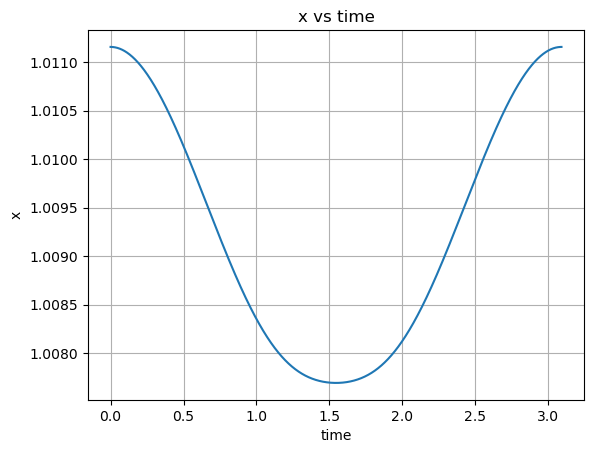

In [10]:
plt.figure()
plt.plot(time ,r[:,0])
plt.xlabel("time")
plt.ylabel("x")
plt.title("x vs time")
plt.grid()
plt.show()

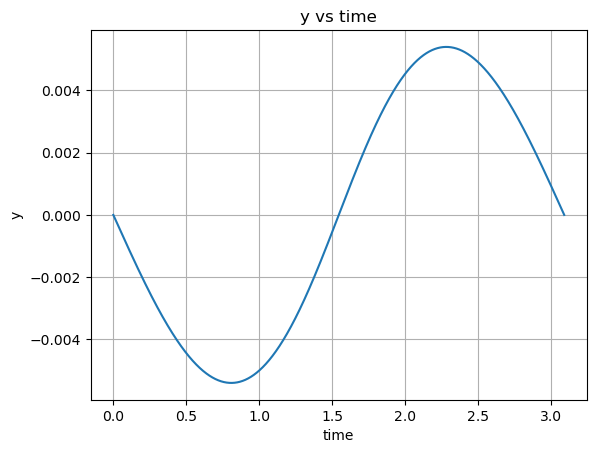

In [11]:
plt.figure()
plt.plot(time ,r[:,1])
plt.xlabel("time")
plt.ylabel("y")
plt.title("y vs time")
plt.grid()
plt.show()

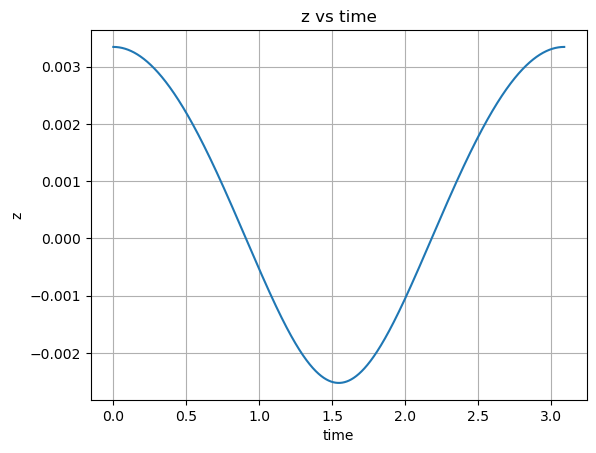

In [12]:
plt.figure()
plt.plot(time ,r[:,2])
plt.xlabel("time")
plt.ylabel("z")
plt.title("z vs time")
plt.grid()
plt.show()

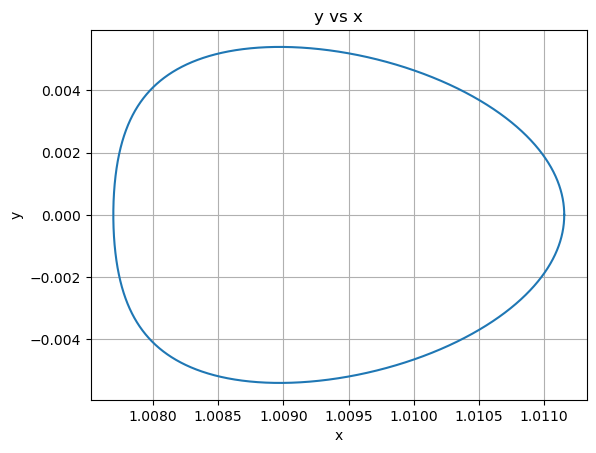

In [13]:
plt.figure()
plt.plot(r[:,0] ,r[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("y vs x")
plt.grid()
plt.show()

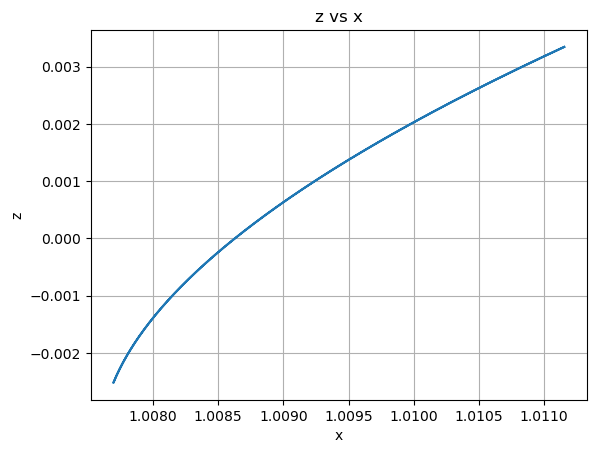

In [14]:
plt.figure()
plt.plot(r[:,0] ,r[:,2])
plt.xlabel("x")
plt.ylabel("z")
plt.title("z vs x")
plt.grid()
plt.show()

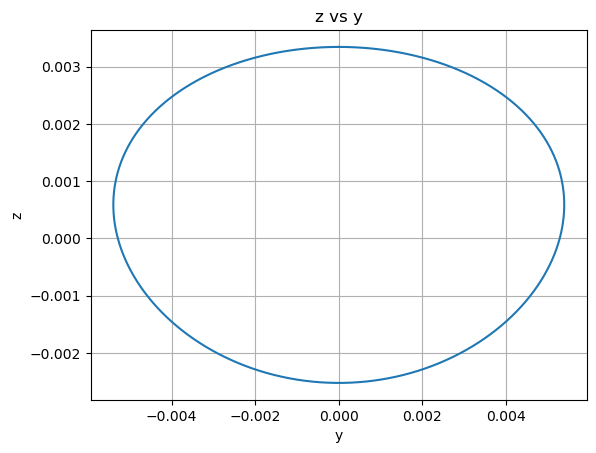

In [15]:
plt.figure()
plt.plot(r[:,1] ,r[:,2])
plt.xlabel("y")
plt.ylabel("z")
plt.title("z vs y")
plt.grid()
plt.show()

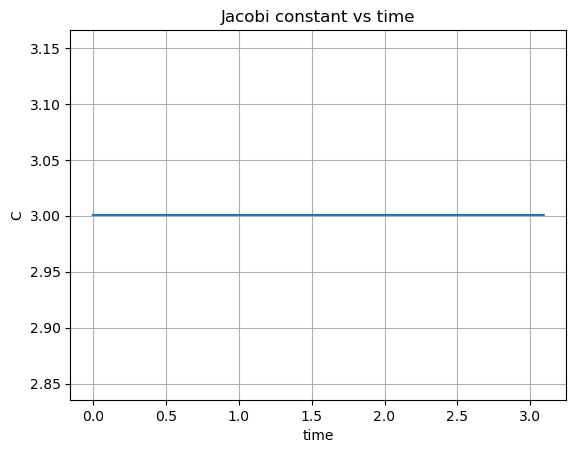

In [16]:
plt.figure()
plt.plot(time ,c_rk4)
plt.xlabel("time")
plt.ylabel("C")
plt.title("Jacobi constant vs time")
plt.grid()
plt.show()

In [17]:
import mpmath as mp

mp.mp.dps = 12

# ---------- Problem data ----------
mu = mp.mpf('3.0542e-6')

x0 = mp.mpf('1.0111555695836572')
z0 = mp.mpf('3.3421700407359777e-3')
yd0 = mp.mpf('-1.0398439218275901e-2')

T = mp.mpf('3.0913102168233957')

# ---------- Time grid ----------
N = 30
tgrid = [T*i/N for i in range(N)]

# ---------- Solve m from period ----------
def solve_m(lam, m_prev):
    target = lam*T/4
    f = lambda mm: mp.ellipk(mm) - target
    return mp.findroot(f, m_prev)

# ---------- CRTBP acceleration ----------
def crtbp_acc(x,y,z,xd,yd):

    r1 = mp.sqrt((x+mu)**2 + y**2 + z**2)
    r2 = mp.sqrt((x-1+mu)**2 + y**2 + z**2)

    ax = x + 2*yd \
        - (1-mu)*(x+mu)/r1**3 \
        - mu*(x-1+mu)/r2**3

    ay = y - 2*xd \
        - (1-mu)*y/r1**3 \
        - mu*y/r2**3

    az = -(1-mu)*z/r1**3 - mu*z/r2**3

    return ax, ay, az

# ---------- Residual vector ----------
def residual(theta, m_prev):

    # added f4
    p, p2, p3, p4, f, f2, f3, f4, f5, a2, a3, a4, lam = theta

    # update m from period constraint
    m = solve_m(lam, m_prev)

    s = x0 - p - p2 - p3 - p4
    d = z0 - f - f2 - f3 - f4 - f5
    a = (yd0/lam) - 2*a2 - 3*a3 -4*a4

    R = []

    for t in tgrid:

        u1 = lam*t
        u2 = 2*lam*t
        u3 = 3*lam*t
        u4 = 4*lam*t
        u5 = 5*lam*t

        sn1 = mp.ellipfun('sn', u1, m)
        cn1 = mp.ellipfun('cn', u1, m)
        dn1 = mp.ellipfun('dn', u1, m)

        sn2 = mp.ellipfun('sn', u2, m)
        cn2 = mp.ellipfun('cn', u2, m)
        dn2 = mp.ellipfun('dn', u2, m)

        sn3 = mp.ellipfun('sn', u3, m)
        cn3 = mp.ellipfun('cn', u3, m)
        dn3 = mp.ellipfun('dn', u3, m)

        sn4 = mp.ellipfun('sn', u4, m)
        cn4 = mp.ellipfun('cn', u4, m)
        dn4 = mp.ellipfun('dn', u4, m)

        sn5 = mp.ellipfun('sn', u5, m)
        cn5 = mp.ellipfun('cn', u5, m)
        dn5 = mp.ellipfun('dn', u5, m)

        # ---------- positions ----------
        x = s + p*cn1 + p2*cn2 + p3*cn3 + p4*cn4
        y = a*sn1 + a2*sn2 + a3*sn3 + a4*sn4
        z = d + f*cn1 + f2*cn2 + f3*cn3 + f4*cn4 + f5*cn5

        # ---------- velocities ----------
        xd = (-p*lam*sn1*dn1 
             -2*p2*lam*sn2*dn2 
             -3*p3*lam*sn3*dn3 
             -4*p4*lam*sn4*dn4 )
        
        yd = (a*lam*cn1*dn1 
             +2*a2*lam*cn2*dn2 
             +3*a3*lam*cn3*dn3 
             +4*a4*lam*cn4*dn4 )

        zd = (-f*lam*sn1*dn1 
             -2*f2*lam*sn2*dn2 
             -3*f3*lam*sn3*dn3 
             -4*f4*lam*sn4*dn4 
             -5*f5*lam*sn5*dn5)

        # ---------- accelerations ----------
        xdd = (
            -p*(lam**2)*cn1*(dn1**2)
            -4*p2*(lam**2)*cn2*(dn2**2)
            -9*p3*(lam**2)*cn3*(dn3**2)
            +m*p*(lam**2)*cn1*(sn1**2)
            +4*m*p2*(lam**2)*cn2*(sn2**2)
            +9*m*p3*(lam**2)*cn3*(sn3**2)
            -16*p4*(lam**2)*cn4*(dn4**2)
            +16*m*p4*(lam**2)*cn4*(sn4**2)
        )

        ydd = (
            -a*(lam**2)*(dn1**2)*sn1
            -a*m*(lam**2)*(cn1**2)*sn1
            -4*a2*(lam**2)*(dn2**2)*sn2
            -4*a2*m*(lam**2)*(cn2**2)*sn2
            -9*a3*(lam**2)*(dn3**2)*sn3
            -9*a3*m*(lam**2)*(cn3**2)*sn3
            -16*a4*(lam**2)*(dn4**2)*sn4
            -16*a4*m*(lam**2)*(cn4**2)*sn4
        )

        zdd = (
            -f*(lam**2)*cn1*(dn1**2)
            -4*f2*(lam**2)*cn2*(dn2**2)
            -9*f3*(lam**2)*cn3*(dn3**2)
            -16*f4*(lam**2)*cn4*(dn4**2)
            +m*f*(lam**2)*cn1*(sn1**2)
            +4*m*f2*(lam**2)*cn2*(sn2**2)
            +9*m*f3*(lam**2)*cn3*(sn3**2)
            +16*m*f4*(lam**2)*cn4*(sn4**2)
            -25*f5*(lam**2)*cn5*(dn5**2)
            +25*f5*m*(lam**2)*cn5*(sn5**2)
        )

        ax, ay, az = crtbp_acc(x,y,z,xd,yd)

        R.append(xdd - ax)
        R.append(ydd - ay)
        R.append(zdd - az)

    

    return mp.matrix(R), m

# ---------- Jacobian ----------
def jacobian(theta, m_prev):

    eps = mp.mpf('1e-6')

    R0, m_new = residual(theta, m_prev)

    mR = len(R0)
    n = len(theta)

    J = mp.zeros(mR, n)

    for j in range(n):

        step = eps*(1+abs(theta[j]))

        tp = list(theta)
        tp[j] += step

        Rp, _ = residual(tp, m_new)

        col = (Rp - R0)/step

        for i in range(mR):
            J[i,j] = col[i]

    return J, R0, m_new

# ---------- Gauss–Newton loop ----------
theta = mp.matrix([
    mp.mpf('0.00232012371400854'),  #p
    mp.mpf('0.0'),   #p2
    mp.mpf('0.0'),   #p3 
    mp.mpf('0.0'),  #p4
    mp.mpf('0.00243440831220411'),    #f
    mp.mpf('0.0'),    # f2
    mp.mpf('0.0'),    #f3 
    mp.mpf('0.0'),    #f4
    mp.mpf('0.0'),    #f5
    mp.mpf('0.0'),    #a2
    mp.mpf('0.0'),    #a3
    mp.mpf('0.0'),    #a4
    mp.mpf('1.99521832750105') # lamda
])

m_current = mp.mpf('-0.0765635925193827')

for k in range(50):

    J, R, m_current = jacobian(theta, m_current)

    JT = J.transpose()
    H = JT*J
    g = JT*R

    delta = mp.lu_solve(H, g)
    theta = theta - 0.7*delta

    cost = mp.fsum(r*r for r in R)

    print("Iter", k, "cost =", cost,
          "lambda =", theta[-1],
          "m =", m_current)

print("\nOptimized parameters:")
print(theta)
print("Final m =", m_current)


Iter 0 cost = (0.00729465722906 + 0.0j) lambda = 0.0 m = -0.0765635925192
Iter 1 cost = (0.000927581497219 + 0.0j) lambda = 0.0 m = (-0.0152646723256 + 0.0j)
Iter 2 cost = (9.77331501461e-5 + 0.0j) lambda = 0.0 m = (0.0204253666786 + 0.0j)
Iter 3 cost = (1.03234403535e-5 + 0.0j) lambda = 0.0 m = (0.0258611735389 + 0.0j)
Iter 4 cost = (2.02855600051e-6 + 0.0j) lambda = 0.0 m = (0.027602516421 + 0.0j)
Iter 5 cost = (1.2699743618e-6 + 0.0j) lambda = 0.0 m = (0.0281952325342 + 0.0j)
Iter 6 cost = (1.20138649792e-6 + 0.0j) lambda = 0.0 m = (0.0284007936883 + 0.0j)
Iter 7 cost = (1.19520591269e-6 + 0.0j) lambda = 0.0 m = (0.0284718504084 + 0.0j)
Iter 8 cost = (1.19464953322e-6 + 0.0j) lambda = 0.0 m = (0.0284971139794 + 0.0j)
Iter 9 cost = (1.1945994777e-6 + 0.0j) lambda = 0.0 m = (0.0285066895064 + 0.0j)
Iter 10 cost = (1.19459498174e-6 + 0.0j) lambda = 0.0 m = (0.0285103916672 + 0.0j)
Iter 11 cost = (1.194594578e-6 + 0.0j) lambda = 0.0 m = (0.0285113198132 + 0.0j)
Iter 12 cost = (1.1945945

In [18]:
# base orbit propogation

p = 0.0017588542516
p2 = 0.00016222254532
p3 = -2.90351879343e-5
p4 = 6.08619709084e-6
f = 0.0029047709036  
f2 = -0.000192723265721  
f3 = 2.69185313526e-5  
f4 = -6.21449250048e-6 
f5 = 1.32960882958e-6
a2 = 0.000198448157069 
a3 = -3.05714131822e-5 
a4 = 7.52129149999e-6

lamda = 2.04725622022 
m = 0.0285103051544

s = x0 - p - p2 - p3 - p4
a = (yd0/lamda) - 2*a2 - 3*a3 -4*a4
d = z0 - f - f2 - f3 - f4 - f5

rb = []
timeb = []
Cbase = []

for t in (np.arange(0,t_final,h)):

        xb = ( s + p * float(mp.re(mp.ellipfun('cn', lamda * t, m)))  
                 + p2 * float(mp.re(mp.ellipfun('cn', 2 * lamda * t, m)))  
                 + p3 * float(mp.re(mp.ellipfun('cn', 3 * lamda * t, m)))  
                 + p4 * float(mp.re(mp.ellipfun('cn', 4 * lamda * t, m))) )
             
    
        yb = ( a * float(mp.re(mp.ellipfun('sn', lamda * t, m)))  
               + a2 * float(mp.re(mp.ellipfun('sn', 2 * lamda * t, m)))  
               + a3 * float(mp.re(mp.ellipfun('sn', 3 * lamda * t, m)))  
               + a4 * float(mp.re(mp.ellipfun('sn', 4 * lamda * t, m))) )
    
        zb = ( d + f * float(mp.re(mp.ellipfun('cn', lamda * t, m)))  
               + f2 * float(mp.re(mp.ellipfun('cn', 2 * lamda * t, m)))  
               + f3 * float(mp.re(mp.ellipfun('cn', 3 * lamda * t, m)))  
               + f4 * float(mp.re(mp.ellipfun('cn', 4 * lamda * t, m)))  
               + f5 * float(mp.re(mp.ellipfun('cn', 5 * lamda * t, m))) )
    

    
        xbd = ( -p * lamda * float(mp.re(mp.ellipfun('sn', lamda * t, m))) * float(mp.re(mp.ellipfun('dn', lamda * t, m)))  
                -2 * p2 * lamda * float(mp.re(mp.ellipfun('sn', 2 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 2 * lamda * t, m)))    
                -3 * p3 * lamda * float(mp.re(mp.ellipfun('sn', 3 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 3 * lamda * t, m)))  
                -4 * p4 * lamda * float(mp.re(mp.ellipfun('sn', 4 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 4 * lamda * t, m))) ) 


        ybd = ( a * lamda * float(mp.re(mp.ellipfun('cn', lamda * t, m))) * float(mp.re(mp.ellipfun('dn', lamda * t, m)))  
                + 2 * a2 * lamda * float(mp.re(mp.ellipfun('cn', 2 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 2 * lamda * t, m)))  
                + 3 * a3 * lamda * float(mp.re(mp.ellipfun('cn', 3 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 3 * lamda * t, m)))  
                + 4 * a4 * lamda * float(mp.re(mp.ellipfun('cn', 4 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 4 * lamda * t, m))) )


        zbd = ( -f * lamda * float(mp.re(mp.ellipfun('sn', lamda * t, m))) * float(mp.re(mp.ellipfun('dn', lamda * t, m)))  
                -2 * f2 * lamda * float(mp.re(mp.ellipfun('sn', 2 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 2 * lamda * t, m)))   
                -3 * f3 * lamda * float(mp.re(mp.ellipfun('sn', 3 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 3 * lamda * t, m)))  
                -4 * f4 * lamda * float(mp.re(mp.ellipfun('sn', 4 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 4 * lamda * t, m)))  
                -5 * f5 * lamda * float(mp.re(mp.ellipfun('sn', 5 * lamda * t, m))) * float(mp.re(mp.ellipfun('dn', 5 * lamda * t, m))) )

        rho1b = np.sqrt(((xb+mu2)**2)+(yb**2)+(zb**2))

        rho2b = np.sqrt(((xb-1+mu2)**2)+(yb**2)+(zb**2))

        Cb = (xb**2) + (yb**2) + ((2*mu1)/(rho1b)) + ((2*mu2)/(rho2b)) - ((xbd**2)+(ybd**2)+(zbd**2))

        Cbase.append(Cb)
        rb.append([xb,yb,zb])
        timeb.append(t)
    
    
Cbase = np.array(Cbase)
rb = np.array(rb)  
timeb = np.array(timeb)

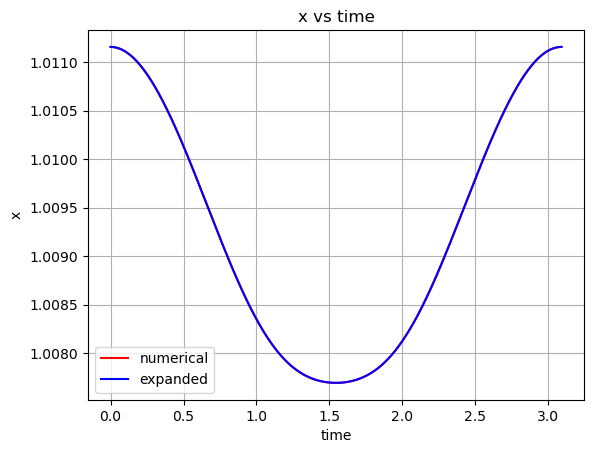

In [45]:
plt.figure()
plt.plot(time ,r[:,0],label='numerical', color='r')
plt.plot(timeb ,rb[:,0],label='expanded',color='b')
plt.xlabel("time")
plt.ylabel("x")
plt.title("x vs time")
plt.grid()
plt.legend()
plt.show()

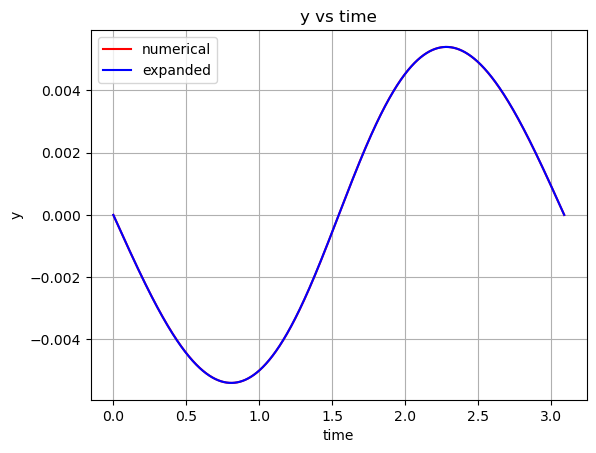

In [46]:
plt.figure()
plt.plot(time ,r[:,1],label='numerical', color='r')
plt.plot(timeb ,rb[:,1],label='expanded',color='b')
plt.xlabel("time")
plt.ylabel("y")
plt.title("y vs time")
plt.grid()
plt.legend()
plt.show()

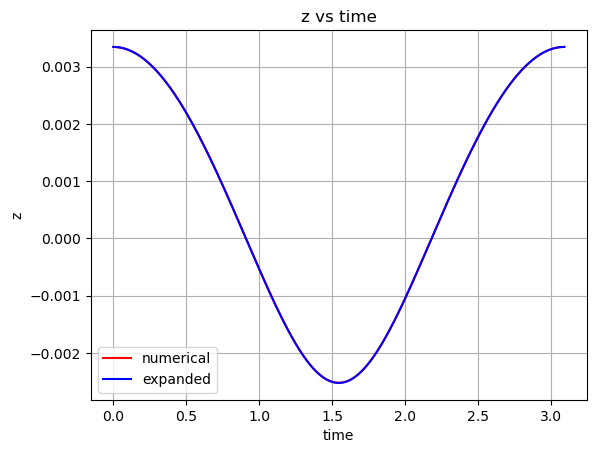

In [47]:
plt.figure()
plt.plot(time ,r[:,2],label='numerical', color='r')
plt.plot(timeb ,rb[:,2],label='expanded',color='b')
plt.xlabel("time")
plt.ylabel("z")
plt.title("z vs time")
plt.grid()
plt.legend()
plt.show()

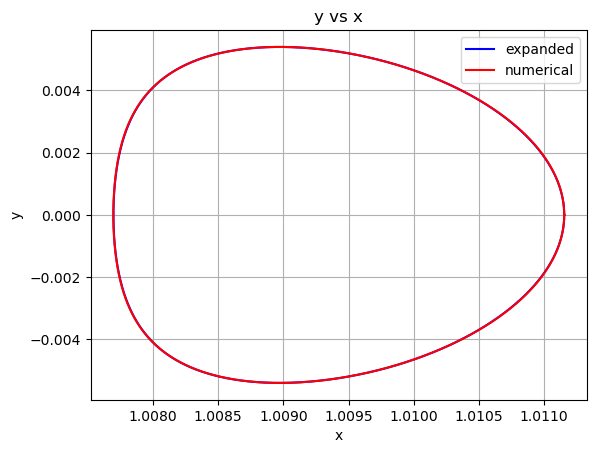

In [48]:
plt.figure()
plt.plot(rb[:,0] ,rb[:,1],label='expanded',color='b')
plt.plot(r[:,0] ,r[:,1],label='numerical', color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("y vs x")
plt.grid()
plt.legend()
plt.show()

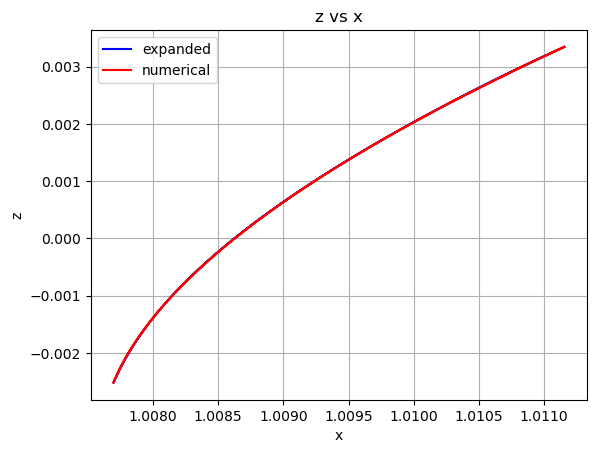

In [49]:
plt.figure()
plt.plot(rb[:,0] ,rb[:,2],label='expanded',color='b')
plt.plot(r[:,0] ,r[:,2],label='numerical', color='r')
plt.xlabel("x")
plt.ylabel("z")
plt.title("z vs x")
plt.grid()
plt.legend()
plt.show()

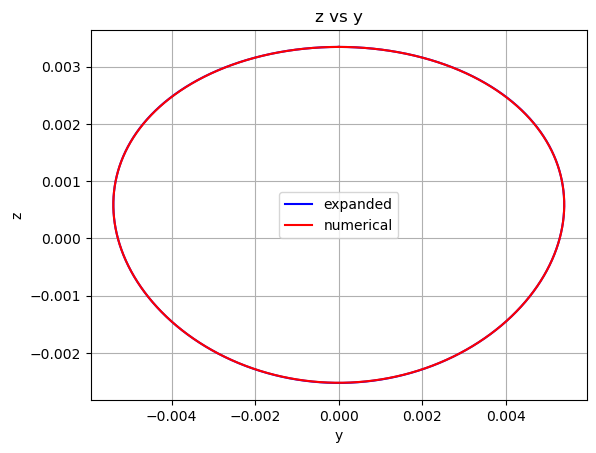

In [50]:
plt.figure()
plt.plot(rb[:,1] ,rb[:,2],label='expanded',color='b')
plt.plot(r[:,1] ,r[:,2],label='numerical', color='r')
plt.xlabel("y")
plt.ylabel("z")
plt.title("z vs y")
plt.grid()
plt.legend()
plt.show()

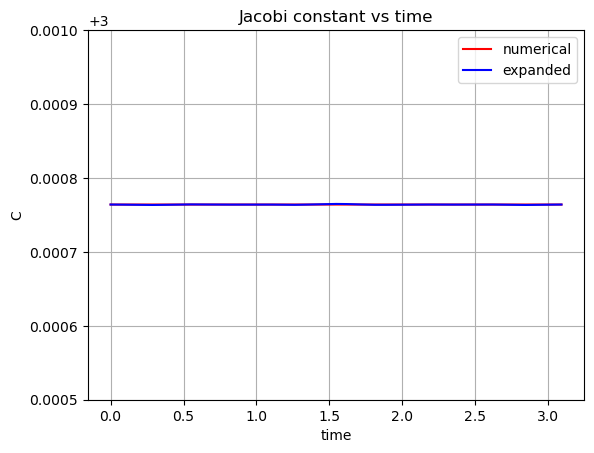

In [51]:
plt.figure()
plt.plot(time ,c_rk4, label='numerical', color='r')
plt.plot(timeb ,Cbase, label='expanded',color='b')
plt.xlabel("time")
plt.ylabel("C")
plt.title("Jacobi constant vs time")
plt.legend()
plt.ylim(3.0005, 3.001)
plt.grid()
plt.show()

In [52]:
rb=rb.astype(float)


In [53]:
rb

array([[ 1.01115557e+00, -4.39163921e-22,  3.34217004e-03],
       [ 1.01115557e+00, -1.03984392e-06,  3.34216999e-03],
       [ 1.01115557e+00, -2.07968779e-06,  3.34216985e-03],
       ...,
       [ 1.01115557e+00,  2.17504844e-06,  3.34216983e-03],
       [ 1.01115557e+00,  1.13520456e-06,  3.34216998e-03],
       [ 1.01115557e+00,  9.53606488e-08,  3.34217004e-03]])

In [54]:
r

array([[ 1.01115557e+00,  0.00000000e+00,  3.34217004e-03],
       [ 1.01115557e+00, -1.03984392e-06,  3.34216999e-03],
       [ 1.01115557e+00, -2.07968779e-06,  3.34216985e-03],
       ...,
       [ 1.01115557e+00,  2.18592626e-06,  3.34216983e-03],
       [ 1.01115557e+00,  1.14608239e-06,  3.34216998e-03],
       [ 1.01115557e+00,  1.06238475e-07,  3.34217004e-03]])

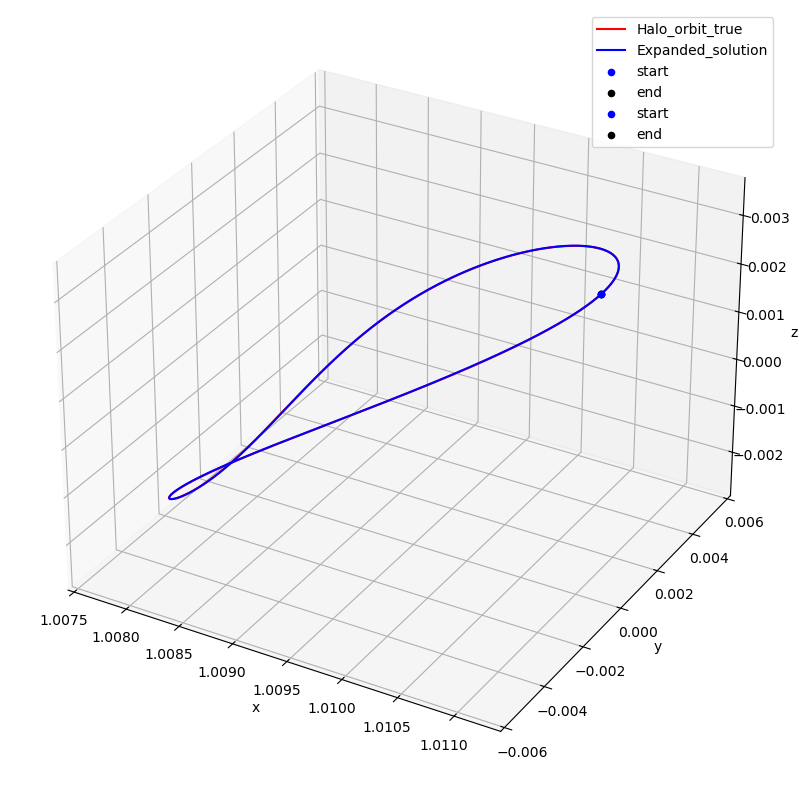

In [55]:
# plotting halo-orbit trajectory

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xb = rb[:,0]
yb = rb[:,1]
zb = rb[:,2]   

x = r[:,0]
y = r[:,1]
z = r[:,2] 
    

ax.plot(x,y,z, label='Halo_orbit_true', color='red')
ax.plot(xb,yb,zb, label='Expanded_solution', color='blue')

ax.scatter(x[0], y[0], z[0], color='blue', marker='o', label='start')
ax.scatter(x[-1], y[-1], z[-1], color='black', marker='o', label='end')

ax.scatter(xb[0], yb[0], zb[0], color='blue', marker='o', label='start')
ax.scatter(xb[-1], yb[-1], zb[-1], color='black', marker='o', label='end')

# Labels and legend

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.set_title('Halo_orbit_comparison')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [56]:
s

mpf('1.00925744177766')

In [57]:
1.00925744175765

1.00925744175765

In [58]:
a

mpf('-0.00541447477483903')

In [59]:
-0.00541447461319589

-0.00541447461319589

In [60]:
d

mpf('0.000608088755175373')

In [61]:
0.000608088764306625

0.000608088764306625

In [62]:
1.19459454265e-6

1.19459454265e-06

In [63]:
time.shape

(30914,)

In [64]:
timeb.shape

(30914,)

In [65]:
np.abs((yb-y)).max()

np.float64(5.530806123146652e-06)

In [66]:
np.abs((xb-x)).max()

np.float64(3.957472111792981e-06)

In [67]:
np.abs((zb-z)).max()

np.float64(2.7401400711328516e-06)

In [68]:
np.abs((Cbase-c_rk4)).max()

mpf('8.13117229991889e-7')

In [69]:
Cbase

array([mpf('3.00076404582569'), mpf('3.00076404582569'),
       mpf('3.00076404582524'), ..., mpf('3.00076404582478'),
       mpf('3.00076404582524'), mpf('3.00076404582569')], dtype=object)

In [70]:
c_rk4

array([3.00076405, 3.00076405, 3.00076405, ..., 3.00076405, 3.00076405,
       3.00076405])